# Overlaying Boxplot, Violin plot and Scatter plot
Sarah 06/23
To use this code:
1. Load your data (could be ndarray or list) to this form: [population1, population2, population3,..,population x]
2. Change the title, ylabel, xlabel, and color for the plot
3. Comment out p-value calculation for unpaired data (p-value cannot be calculated and will throw an error)

Default params: 
- ylim : y-axis lower and upper limit, from 0 to 1.1 times the max value of your Data
- alpha : opacity for scatter plot and violin plot
- dotsize : size for the dots in scatter plot
- figure annotation is centered horizontally and 0.9 times the y-axis upper limit

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

# Sample data
Population1 = [2.33, 2,    2.5,  1.17, 1.17, 1.5,  1.83, 1.83, 1.5,  1.17, 1.33, 1.5,  1.5,  1.5,
               2.33, 1.67, 1.67, 1,    1.17, 2.17, 1.33, 1.83, 2.33, 1.67, 1.83, 3.83]
Population2 = [4.33, 2.33, 3.17, 2.33, 2.17, 4.17, 4.33, 3.33, 3.83, 3,    3.17, 1.8,  1.5,  2,
               3,   2.5,   3.83, 4.67, 3.17, 2.83, 3.17, 3,    3.33, 2.17, 2.67, 3.33]
Data = [Population1, Population2]

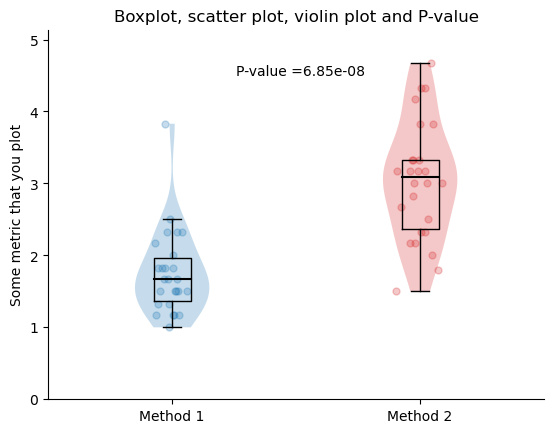

In [2]:
def plot_bpvpsp(Data, 
                title, 
                ylabel, 
                xlabel, 
                ylim,
                color = ["#1f77b4", "#d62728"], #red and blue
                alpha = 0.25, 
                dotsize = 25
                ):

    fig, ax = plt.subplots()
    pval = ""

    # Calculate p-value (Comment next two lines out if you don't have paired data)
    _, p = mannwhitneyu(Population1, Population2, method="exact")
    pval = "P-value ="+ "%0.3g" % p

    # Scatter plot
    xs = []
    for i in range(len(Data)):
        xs.append(np.random.normal(i + 1, 0.04, len(Data[i])))  # adds jitter 
    for i in range(len(xs)):
        ax.scatter(xs[i], Data[i], 
                color=color[i], 
                alpha=alpha, 
                s=dotsize
                )

    # Violin plot
    vp = ax.violinplot(Data, 
                       showmeans=False, 
                       showmedians=False, 
                       showextrema=False, 
                       widths=0.3
                       )
    for i in range(len(vp["bodies"])):
        vp["bodies"][i].set_facecolor(color[i])
        vp["bodies"][i].set_alpha(alpha)

    # Box plot and configure axis
    ax.boxplot(Data, 
               showfliers=False, 
               medianprops=dict(linestyle='-', linewidth=1.5, color='black'))
    ax.set_xticklabels(xlabel)
    ax.set_ylim(ylim)
    ax.spines[['right', 'top']].set_visible(False)
    ax.annotate(pval, 
                xy = ((len(Data)+1)/2, ylim[1]*0.9), #xy coordinate for the annotation
                xytext=(3, 1.5),
                textcoords='offset points',
                ha="center", va="top",
                )

    plt.title(title)
    plt.ylabel(ylabel)
    plt.show()

title = "Boxplot, scatter plot, violin plot and P-value"
ylabel = "Some metric that you plot"
xlabel = ["Method 1", "Method 2"]
color = ["#1f77b4", "#d62728"]
ylim = [0, np.max(Data)*1.1]

plot_bpvpsp(Data, title, ylabel, xlabel, ylim, color)